<a href="https://colab.research.google.com/github/JacobRammer/CIS423/blob/main/w22_chapter1_handout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1>Chapter One</h1>
</center>

<hr>

#I. Software Engineering and Machine Learning
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

##Let's set our goals

Our goals will be to (1) build and explore machine learning algorithms and (2) take our results the last mile and put our hard work into a web-based production system.

There are commerical tools that focus on this problem, e.g., [Streamlit](https://www.analyticsvidhya.com/blog/2021/06/streamlit-for-ml-web-applications-customers-propensity-to-purchase/) and [FastAI](https://towardsdatascience.com/detecting-deforestation-from-satellite-images-7aa6dfbd9f61), but they are limited. We will do things from the ground up to get exactly what we want. That's why we are in Computer Science :)


##Given 10 weeks, have to skip some things

<img src='https://www.dropbox.com/s/7gpvkskejk5uzl5/Screen%20Shot%202021-12-26%20at%202.15.13%20PM.png?raw=1'>

#Let me switch to a demo


##Prerequisites

We will be programming in Python for the most part. However, much of the action will be with Python libraries. So the real skill needed is to be able to read (online) library documentation, make sense of it, and put it to use.

A second skill is debugging using stackoverflow or similar. You will get errors. Often from libraries. Debugging typically involves searching online for others who have run across similar errors.

We will be doing javascript programming in the latter part of the course. However, I'll keep it simple. While I encourage you to take my simple frontends and gussy them up with fancy frontend libraries you know, that is optional. It could look good on your resume but not required for the course.

There will be no expectation that you have had the CIS machine learning course. We will start from scratch.

#II. The software engineering of model building

A [recent article](https://www.oreilly.com/radar/mlops-and-devops-why-data-makes-it-different) notes that we need the idea of "MLOps":

<quote>
"The DevOps movement in software engineering adopts well-defined processes, modern tooling, and automated workflows to streamline the process of moving from development to robust production deployments. Why can't we use MLOps to address struggles related to deploying machine learning in production too?"
</quote>

Many of the steps of building and exploring machine learning models can be managed. We will look at the tools available to do this management.

The end goal is to produce well-documented and easily-replicable machine learning pipelines that can be carried into production.

## The software engineering bridge

Somewhat unique to AI-based production systems, the bridge from model building and exploration to production system is under-studied. The vast majority of **publically** available work stops short of moving to production.

In this class, we will consider what information we have to record during model building that allows us to build robust systems with real end-users. Some of this includes documentation of our exploration and building process. Some of it also includes meta-information that we glean during exploration.

In summary, we will consider  what a user of an AI-based system needs to know. Can we just give them a prediction and call it a day? Hint: no. What further information can we provide? Can we explain our reasoning? Hint: yes.

##Recent report on AI in industry

See separate tab for how industry is using AI in its products.

#III. Where Are We?

<left>
<img src='https://www.centeredrecoveryprograms.com/wp-content/uploads/2017/12/you-are-here-map-pin-location-navigation-3-d-animation_s68bji6we_thumbnail-full08.png' height = 200>
</left>

I believe all of you have used jupyter notebooks in your courses. We will use it exclusivley in this course. Yes, I said exclusively. What??? How can you run a web server in a notebook? We will find out :)

We will also be using Google Colab exclusively. Some of you may be less knowledgable about Colab. So let me give you the big picture.

**Jupyter notebook** This is a web-based programming environment. A Jupyter notebook is not the same thing as Python.  One type of content is Python code, although you could use other programming languages in your Jupyter notebook. One of the great features of these notebooks is that you can share them with others. BTW: Jupyter was invented by 2 (non-cs) grad students in their spare time :)

**Python runtime** This is often called the "kernel". The runtime is hooked into a Jupyter notebook. 

**Google colab** We will refer to this as a "Colab Notebook." In some ways this is an alternative to a Docker image. It includes most of the libraries that we will need out of the box. And it is easy to install others. It gives us a CLI to the local linux OS. It gives us (temporary) local file store. And an easy way to extend that to the permanent file store of Google Drive. 

**Server farm** There is a good chance that your notebook and code are actually running in Google's server-farm in the Dalles, Oregon. 
Colab gives us access to CPUs and GPUs that run on that farm.
<center><img src='https://lh3.googleusercontent.com/jazh9k5V944pGmE6ch-GMDzobLiz-z_y3yVXjC_O9NxIfkNNf4bFIg1hr1rfUiJ87dqVYZ2i4gr7bzYr6S-Q-oU6KCx1zIPj-X1_Bw=w800-l80-sg-rj-c0xffffff' height=200>
</center>


So where are you at this very minute? You are working in a Jupyter notebook that is connected to a Python kernel, running on Google Colab housed in the cloud (possibly in the Beaver state). Nice!

##How to turn in your notebook for grading

I am going to conserve energy and reuse a video I produced for a more introductory course. I know you know most of this, so skip toward end if you want. It tells you how to get a link to turn in to Canvas for grading.

[How to turn in homework.](https://uoregon.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=1e9a3050-5a56-4ce5-a14f-ac2b0171d607)
 




<hr>
<pre>


</pre>
#IV. Python review
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

I know you know Python. I just want to review a few ideas from Python that we will use heavily.

## f strings

---
We can build strings from pieces of text and python values. Let me show you.

In [ ]:
a_variable = 3
f'The letter "a" appears {a_variable} times in this sentence.'

'The letter "a" appears 3 times in this sentence.'

Without the f.

In [ ]:
'The letter "a" appears {a_variable} times in this sentence.'

'The letter "a" appears {a_variable} times in this sentence.'

## assert statements

I'll use these for both checking my work and as a replacement for a full type-checking system for functions I define.

As reminder of the syntax, check this out.

In [ ]:
a_condition = []
assert a_condition, f'a_condition is {a_condition} instead of True'

If the condition evaluates to True, the assert is silent.

## asserts as type checkers

I tend to use assert in function bodies as a workaround from lacking a robust typing system in Python. You have to be careful to ask your assert questions in general to specific order. You can see that in the example code below.

1. Most generally, is `x` a list?
2. Ok, is `x` non-empty?
3. Ok, does `x` contain all inner lists?



In [ ]:
#Note that type hints in Colab are just hints - no actual checking happens

def first_in_list_of_lists(x:list)->list:
  assert isinstance(x,list), f'expecting x to be list but is instead {type(x)}'
  assert len(x)>0, f'expecting x to be non-empty'
  assert all([isinstance(y, list) for y in x]), f'expecting x to be list of lists but is instead list of {type(x[0])}'
  
  return x[0]

In [ ]:
first_in_list_of_lists(34)

AssertionError: ignored

In [ ]:
first_in_list_of_lists([])

AssertionError: ignored

In [ ]:
first_in_list_of_lists([1,2,3])

AssertionError: ignored

In [ ]:
first_in_list_of_lists([[1], [2]])

[1]

##list comprehensions

I much prefer these over for-loops. Sometimes you need a for-loop. But many times a list comprehension will suffice.

In [ ]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
[i if i%2==0 else -1 for i in range(10)]

[0, -1, 2, -1, 4, -1, 6, -1, 8, -1]

In [ ]:
[i for i in range(10) if i%2==0]  #subtle - this one filters

[0, 2, 4, 6, 8]

In [ ]:
[a+b for a,b in zip([1,2,3], [4,5,6])]

[5, 7, 9]

<img src='https://www.dropbox.com/s/8x575mvbi1xumje/cash_line.png?raw=1' height=3 width=500><br>
<img src='https://www.gannett-cdn.com/-mm-/56cbeec8287997813f287995de67747ba5e101d5/c=9-0-1280-718/local/-/media/2018/02/15/Phoenix/Phoenix/636542954131413889-image.jpg' height=50>
The Python string replace method is broken! Everyone is scrambling to fix it. But you step up to help out. You write a function `temp_replace` that does the same thing (mostly).

I'll simplify and constrain `old` to be a single character.


##Share with class (anonymously)

When you are done, take a screenshot of your code (I use cmd-shift-4 on my mac to get sizable window). Then paste it on this page: https://app.mural.co/invitation/mural/cis4236034/1639511781261?sender=u173416b87b3b8c1cbe335790&key=3993cb03-56a9-4fe5-b4d9-6304e32ff459.

Right click on the screen and import file. You will have to find your screenshot file on your computer. Then resize it if it is too big.

In [ ]:
def temp_replace(s:str, old:str, new:str) -> str:
  #asserts below

  return [new if i == old else i for i in s]
  #body below - use list comprehension - remember old is a single character


In [ ]:
#test your function
test_string = 'abcde'
(temp_replace(test_string, 'd', 'z'), temp_replace(test_string, 'A', '4'))  #('abcze', 'abcde')

(['a', 'b', 'c', 'z', 'e'], ['a', 'b', 'c', 'd', 'e'])

<hr>
<pre>


</pre>
#V. The pandas library
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

pandas has lots of tools for exploring a tabular dataset. We will touch on a few of those tools before moving on.

In [ ]:
import pandas as pd  #convention to use pd as nickname - follow it!

##url is way to go

It may not always be possible, but if you can get a url for your data, pandas can use it for loading. Saves messing with file paths and reading in as file. Pretty slick.

And good news. If you store your data on Dropbox or Google Drive or GitHub, you can get a url that pandas can use. I have yet to get a usable url from iCloud.

Below, I am accessing data I have on my Google Drive. I could have also stored the data on GitHub and accessed the url from there. I like Drive a little better because it gives a good table editor for making manual changes.

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQjIoC4LWfiuFmnix6TUAGSOPK29QMsn5Sb9DS73mNmMqikngNSG9ntmxHUO7ySZXTPpmoP8yAV0auz/pub?output=csv'  #plain old string I got from Google Sheets
titanic_table = pd.read_csv(url)  #using pandas to read in an entire dataset - the coolest

In [ ]:
len(titanic_table)

2208

In [ ]:
titanic_table.head(5)  #print first 5 rows of the table

,Name,Age,Gender,Class,Joined,Married,Survived,Fare,Bio,Occupation,Class/Dept,Cabin,Boat,Nationality,URL
0,"ABBING, Mr Anthony",41.0,Male,C3,Southampton,0.0,0,7.0,"anthony abbing was born in cincinnati,...",Blacksmith,3rd Class Passenger,NaN,NaN,American,https://www.encyclopedia-titanica.org/titanic-...
1,"ABBOTT, Mr Ernest Owen",21.0,Male,Crew,Southampton,0.0,0,0.0,ernest owen abbott was born in southam...,Lounge Pantry Steward,Victualling Crew,NaN,NaN,English,https://www.encyclopedia-titanica.org/titanic-...
2,"ABBOTT, Mr Eugene Joseph",13.0,Male,C3,Southampton,NaN,0,20.0,"\tmaster eugene joseph abbott, 13, w...",Scholar,3rd Class Passenger,NaN,NaN,American,https://www.encyclopedia-titanica.org/titanic-...
3,"ABBOTT, Mr Rossmore Edward",16.0,Male,C3,Southampton,0.0,0,NaN,"mr rossmore edward abbott, 16, of prov...",Jeweller,3rd Class Passenger,NaN,NaN,"English, American",https://www.encyclopedia-titanica.org/titanic-...
4,"ABELSON, Mr Samuel",NaN,Male,C2,Cherbourg,0.0,0,24.0,"mr samuel abelson, 30, from russia, an...",NaN,2nd Class Passenger,NaN,NaN,Russian,https://www.encyclopedia-titanica.org/titanic-...


In [ ]:
titanic_table.describe(include='all').T  #Transpose table to make more readable

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,2208,2201,"KELLY, Mr James",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2198,NaN,NaN,NaN,30.4527,12.2867,1,22,29,38,74
Gender,2208,2,Male,1719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,2207,4,Crew,950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joined,2208,4,Southampton,1614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,2207,NaN,NaN,NaN,0.349796,0.477014,0,0,0,1,1
Survived,2208,NaN,NaN,NaN,0.322464,0.467525,0,0,0,1,1
Fare,2206,NaN,NaN,NaN,19.4836,43.0902,0,0,7,20,512
Bio,2145,2145,"mr george milford was born in ryde, is...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,1602,384,Fireman,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Titanic is our jam

I admit the dataset is a bit academic in the sense of who cares what happened over 100 years ago. But it has a mixture of data that will force us to use a range of data engineering tools. And these tools will come in handy on new, important and timely datasets.

So it is a good place to practice getting our tools in order.

###Drop some columns

Before we move on, let's focus on a subset of columns. I'll go into more detail on this in the next chapter. For now, I'll just drop some columns to simplify.

In [ ]:
print(titanic_table.columns.to_list())  #full set of columns

['Name', 'Age', 'Gender', 'Class', 'Joined', 'Married', 'Survived', 'Fare', 'Bio', 'Occupation', 'Class/Dept', 'Cabin', 'Boat', 'Nationality', 'URL']


In [ ]:
titanic_table = titanic_table.drop(columns=['Bio', 'Occupation', 'Class/Dept', 'Cabin', 'Boat', 'Nationality', 'URL'])
titanic_table.head()

,Name,Age,Gender,Class,Joined,Married,Survived,Fare
0,"ABBING, Mr Anthony",41.0,Male,C3,Southampton,0.0,0,7.0
1,"ABBOTT, Mr Ernest Owen",21.0,Male,Crew,Southampton,0.0,0,0.0
2,"ABBOTT, Mr Eugene Joseph",13.0,Male,C3,Southampton,NaN,0,20.0
3,"ABBOTT, Mr Rossmore Edward",16.0,Male,C3,Southampton,0.0,0,NaN
4,"ABELSON, Mr Samuel",NaN,Male,C2,Cherbourg,0.0,0,24.0


<hr>
<pre>


</pre>
#VI. pandas has rudimentary plotting methods
<img src='https://www.dropbox.com/s/9fcc1crlxp19ijt/major_section.png?raw=1' width='300'>

First, let me say we won't be doing any plotting beyond this chapter. This is not because I think it is unimportant, just that there are only 10 weeks in the quarter. But I hated to skip it so we will do a brief look. Plotting is the kind of thing you would typically do the first time you are handed a dataset. The goal is to get a picture of how the data is distributed and possibly correlated.

I can tell you that the standard visualization/plotting library in Python is `matplotlib`. I can also tell you that it is knarly both conceptually and syntactically. I am going to rely on pandas as a "wrapper" for `matplotlib`. What pandas has done is give you plotting methods that hide the messy underlying `matplotlib` code. Thanks, pandas!

##The crosstab method plus the plot method

I can give you, in a single line, the pandas code that can power our investigation of the Titanic data. Here it is:
<pre>
pd.crosstab(table[col1], table[col2]).plot(kind='bar', figsize=(10,6), grid=True, logy=True)
</pre>
Or with a real example that plots `Gender` against `Survived`:
<pre>
pd.crosstab(titanic_table['Gender'], titanic_table['Survived']).plot(kind='bar', figsize=(10,6), grid=True, logy=True)
</pre>
The pandas plotting method is called `plot` and comes last in the method chain. We have 1 method that preceeds it: `crosstab`, which sets up a new table (which gets thrown away after plotting) that has rows and columns set up for plotting, i.e., it is wrangled for plotting. Let's run the code and see what happens.

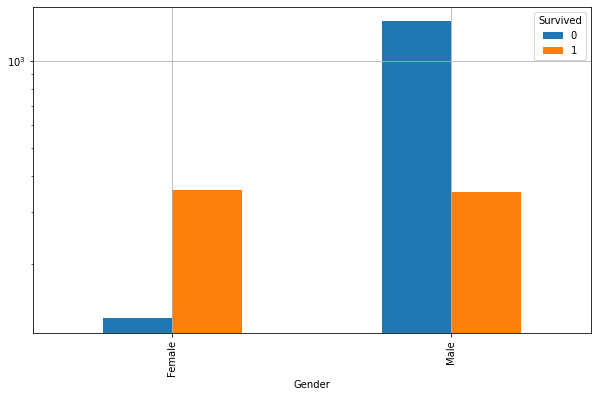

In [ ]:
pd.crosstab(titanic_table['Gender'], titanic_table['Survived']).plot(kind='bar', figsize=(10,6), grid=True, logy=True)

Let's look at the parameters to `plot`.
<pre>
plot(kind='bar', figsize=(10,6), grid=True, logy=True)
</pre>
 It's a kind of  bar chart. It shows the possible values in the `Survived` column, blue being perished, orange survived. The blue line dominates if it is larger and vice versa. `figsize` says the plot should show on a 10 inch wide and 6 inch deep figure. `grid` is used to overlay the plot with grid-lines. `logy` says to scale the data on the y axis, log base 10. I chose to scale because of the tendency for small values to be lost in the plot, e.g., values of 1. With scaling they can be seen more clearly.

Here is another example looking at `Class` cross `Gender`.

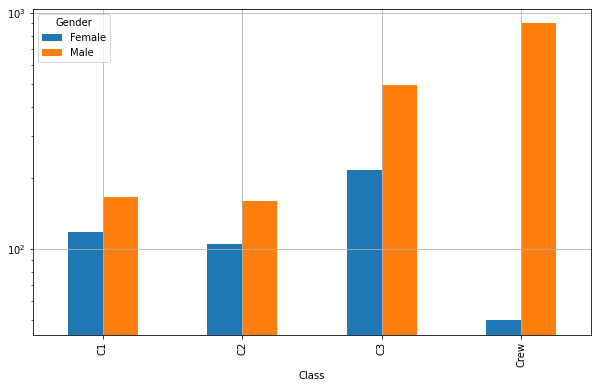

In [ ]:
pd.crosstab(titanic_table['Class'], titanic_table['Gender']).plot(kind='bar', figsize=(10,6), grid=True, logy=True)

## Subsetting the table

There is another pandas concept that is useful. It is the idea of taking a subset of rows based on some condition(s). We can use the `query` method for this. I like query because it generally follows a style called SQL, which has been the standard used to query databases forever - talking 1970s. Here are some examples.
<pre>
fem3_table = titanic_table.query('Gender == "Female" and Class == "C3"')

senior_table = titanic_table.query('Age > 65')
</pre>
The `query` method takes a single argument, a string. So that is straightforward. The complication is in how that string needs to be formatted. You have to remember these key facts:

1. You do **not** have to quote column names.

2. You do have to quote column **values** if they are not numeric, i.e., they are categorical.

3. Do **not** quote a numeric value - just use the number.

4. To do quoting, if you use a single quote for entire string, then use double-quotes for internal things.

Let's try it out.

In [ ]:
c3_female_table = titanic_table.query('Gender == "Female" and Class == "C3"') #quotes around 2 column values
c3_female_table.head(1)

,Name,Age,Gender,Class,Joined,Married,Survived,Fare,Bio,Occupation,Class/Dept,Cabin,Boat,Nationality,URL
11,"AHLIN, Mrs Johanna Persdotter",40.0,Female,C3,Southampton,1.0,0,9.0,mrs lars johan karlsson ahlin was born...,NaN,3rd Class Passenger,NaN,NaN,Swedish,https://www.encyclopedia-titanica.org/titanic-...


Then we plot.

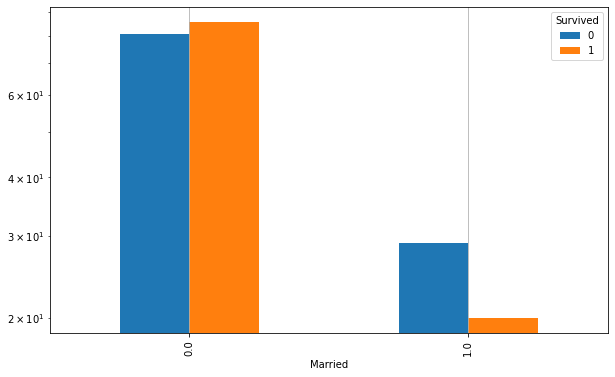

In [ ]:
pd.crosstab(c3_female_table['Married'], c3_female_table['Survived']).plot(kind='bar', figsize=(10,6), grid=True, logy=True)

###`loc` equivalent

Here is equivalent using `loc`.
Note need `&` for `and` and need parens around logical conditions. And square brackets.

 While the `loc` method is powerful, in this case I like `query` better :)

In [ ]:
loc_c3_female_table = titanic_table.loc[(titanic_table['Gender'] == "Female") &
                                        (titanic_table['Class'] == "C3")]


In [ ]:
loc_c3_female_table.head(1)

Here's another.

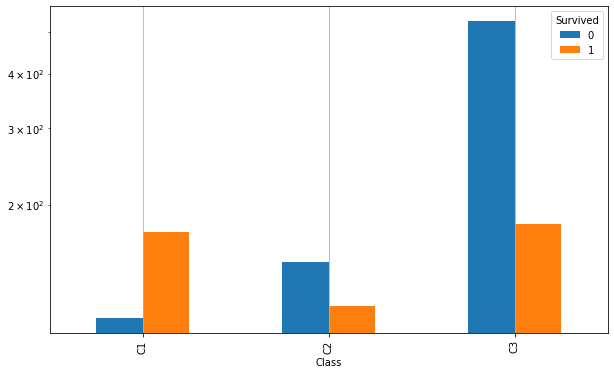

In [ ]:
passenger_table = titanic_table.query('Class != "Crew"')  #not crew, i.e., passengers only
pd.crosstab(passenger_table['Class'], passenger_table['Survived']).plot(kind='bar', figsize=(10,6), grid=True, logy=True)

##Reminder to self

Clear off the mural site before next problem.

<img src='https://www.dropbox.com/s/8x575mvbi1xumje/cash_line.png?raw=1' height=3 width=500><br>
<img src='https://www.gannett-cdn.com/-mm-/56cbeec8287997813f287995de67747ba5e101d5/c=9-0-1280-718/local/-/media/2018/02/15/Phoenix/Phoenix/636542954131413889-image.jpg' height=50 align=center>  Please plot survival by Gender of those who were Married and joined in Cherbourg.

Take a screenshot of your plot and put it on the mural site: https://app.mural.co/invitation/mural/cis4236034/1639511781261?sender=u173416b87b3b8c1cbe335790&key=3993cb03-56a9-4fe5-b4d9-6304e32ff459.

Resize it! So does not take entire screen.



In [ ]:
#subset the tablec
mcher_table = titanic_table.query('Joined == "Cherbourg" and Married == "1.0"')

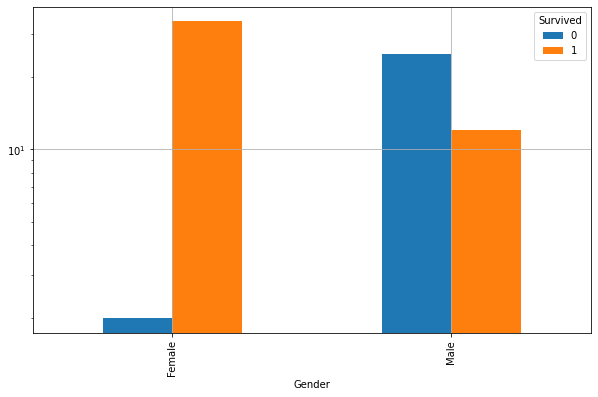

In [ ]:
#crosstab

pd.crosstab(mcher_table['Gender'], mcher_table['Survived']).plot(kind='bar', figsize=(10,6), grid=True, logy=True)

##What we are not covering

There is a lot more initial plotting you might want to do to gain insight into your data. You will cover that in a full-blown data science course.

Our focus is on software engineering so we will move ahead with data wrangling then modeling.

#Putting it All Together: Problems to Solve


I'll give you some problems to work on in a group and on your own. Please turn your notebook in on canvas. Make sure to make the shared link viewable by everyone.


#Challenge 1
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>


Define a function `add_lists` that takes 2 arguments, each a list of ints, and then pair-wise adds items to produce a new list. The one constraint is that if the sum is less than `0`, then it uses `0` for the sum.

Use a list comprehension!

Make sure your arguments look ok by using asserts, i.e., I want you (not Python) to produce error messages.

Here are some test cases:
<pre>
add_lists([1,2,3], [4,5,6]) => [5,7,9]
add_lists([1,2,3], [4,-5,-3]) => [5,0,0]
add_lists([], []) => []
add_lists(1,2) => your error message
add_list([1,2,3], [4,5]) => your error message
add_lists([1, 2],[3, 4.5]) => your error message
</pre>

In [ ]:
#your function here

def add_lists(a:list,b:list) -> list:


In [ ]:
assert add_lists([1,2,3], [4,5,6]) == [5,7,9]

In [ ]:
assert add_lists([1,2,3], [4,-5,-3]) == [5,0,0]

In [ ]:
assert add_lists([], []) == []

In [ ]:
add_lists(1,2) # your error message

In [ ]:
add_list([1,2,3], [4,5]) # your error message

In [ ]:
add_lists([1, 2],[3, 4.5]) # your error message

#Challenge 2
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

If "women and children first" was the ethics of the day, use plotting to find a likely cut off age for "children". At what age did children perish at same rate as everyone else?

Given that there was no definition of children age, it was up to officers on deck to make subjective judgement. The data helps us see what they were using.

Show your plots and your conclusion.


In [ ]:
#subset the table to those below 25
young_table =  

In [ ]:
#crosstab


##So what do you say the age was?

What does the plot tell us about what "children" meant to officers in charge of life boats?

#Challenge 3
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

Figure out how to remove duplicate rows and make sure index has no gaps.

I'll give you a small table to test on. It has duplicate rows so remove one of them. Find the pandas method that deals with duplicates to do this. At the same time, find the pandas method for filling in gaps in the index. You should be able to chain them together.


In [ ]:
test_df = pd.DataFrame({'a': [1,2,2,4], 'b':[3,1,1,5]})
test_df

###Ok, make assert True

Don't change `test_df`. Create a new table `new_df`, instead, with the changes. Here is your target. Notice the index has no gaps.

<img src='https://www.dropbox.com/s/y94jo92nhdr1fr6/Screen%20Shot%202021-10-22%20at%2011.06.27%20AM.png?raw=1' height=150>

In [ ]:
new_df = 
new_df

<pre>
     a	b
0	1	3
1	2	1
2	4	5
</pre>

In [ ]:
#don't modify this cell - make it True
assert len(new_df)+1 == len(test_df)
assert len(new_df.loc[2])==2, f'len is {len(new_df.loc[2])}'  #make sure column not dropped
assert new_df.loc[2,'a']==4, f'loc[2,"a"] not 4 but {new_df.loc[2,"a"]}'  #make sure index looks ok

#Challenge 4
<img src='https://www.dropbox.com/s/3uyvp722kp5to2r/assignment.png?raw=1' width='300'>

This is a chance to get some Python practice. Here is an article that introduces a means of measuring the correlation between 2 columns. Read the article. Then implement a function `my_distance_correlation(a,b)`. Test it out on the `Age` and `Fare` columns. [Distance correlation article](https://towardsdatascience.com/introducing-distance-correlation-a-superior-correlation-metric-d569dc8900c7).

I'm asking you to use the final 100 values in `Age` and `Fare` because they do not contain any NaN values, which would screw up our code.

You can use a library method as an oracle:
<pre>
!pip install dcor
import dcor

dcor.distance_correlation(np.array(a),np.array(b))  #0.31412993552690227
</pre>
where `a` and `b` are the list of the **final** 100 column values in `Age` and `Fare`. You will have to slice to get the last 100. The value 0.`31412993552690227` is your target.

In [ ]:
#slice to get a and b as plain python lists (not numpy arrays)
a = 
b = 

!pip install dcor
import dcor as dc  #the oracle you have to match
import numpy as np

dc.distance_correlation(np.array(a),np.array(b))  #0.31412993552690227

##Here is the general formula

<img src='https://www.dropbox.com/s/ywqbbd6qn8jchwu/Screen%20Shot%202021-08-27%20at%2010.44.29%20AM.png?raw=1' height=150>

In words, the distance correlation (dCor) between 2 vectors X and Y is (a) the distance covariance (dCov) between X and Y, divided by (b) the distance variance (dVar) of X alone times the distance variance of Y alone taken to the .5 power (square root).

We will break this into steps below.

##Reminder of what is in `a` and `b`

In [ ]:
print(a[:5])  #[47.0, 54.0, 43.0, 52.0, 28.0]  #Age
print(b[:5])  #[0.0, 55.0, 55.0, 78.0, 0.0]    #Fare

##Constraint 1: Pure Python

I would like you to practice with pure Python. No outside libraries can be used, e.g., no numpy.

##Constraint 2: List Comprehensions when you can

Please avoid a for-loop when you can use a list comprehension instead. I'll give you hints along the way.

##Step 4.1 Build a distance matrix for both `Age` and `Fare`

Read the paper first to get a general idea of what is going on. The paper breaks computation into steps and I'll do the same. Here is the first step:

<img src='https://miro.medium.com/max/1400/1*rrv85K1EkS4B9tLnugY9-Q.png'>

We are building a "distance matrix" for each list of ages and fares. To decipher, looking at the matrix `aj,k`, the first 2 rows are as follows:
<pre>
[abs(a[0]-a[0]), abs(a[0]-a[1]), abs(a[0]-a[2]), ...]  #row 1
[abs(a[1]-a[0]), abs(a[1]-a[1]), abs(a[1]-a[2]), ...]  #row 2
...
</pre>
Remember `a` is a list of ages (an array, not a matrix). We are converting it to a distance matrix following method above. We should end up with a 100 by 100 matrix if `a` is length 100 to start.

If you have sharp eyes, you may notice that row 1 == column 1, etc.

Please write a function that will compute a distance matrix for a python list of values. 

Note I am showing you scipy and numpy code that does this for you. I think it is ugly and hard to understand. I suppose its benefit is that it is fast. But might be worth looking at speed comparison with your straight Python code. Some other time.

In [ ]:
'''
from scipy.spatial.distance import pdist, squareform
A = a[:, None]  #numpy rescaling required for pdist - yuck
B = b[:, None]
dmatrix_a = squareform(pdist(A))
dmatrix_b = squareform(pdist(B))
'''

def compute_distance_matrix(a:list):
  #your code below. I used for loop and list comprehension combo. I could have used nested list comprehensions,
  #but I find them a bit obtuse.


In [ ]:
dmatrix_a = compute_distance_matrix(a)
dmatrix_b = compute_distance_matrix(b)

print(a)  #[47.0, 54.0, 43.0, 52.0, 28.0, 61.0, 30.0, 25.0, ...
print('========')
print(dmatrix_a[0])  #[0.0, 7.0, 4.0, 5.0, 19.0, 14.0, 17.0, 22.0, 15.0, ...
print(dmatrix_a[1])  #[7.0, 0.0, 11.0, 2.0, 26.0, 7.0, 24.0, 29.0, 22.0, ...
print(dmatrix_a[2])  #[4.0, 11.0, 0.0, 9.0, 15.0, 18.0, 13.0, 18.0, 11.0,...

In [ ]:
print(len(dmatrix_a), len(dmatrix_a[0])) #100 100

In [ ]:
dmatrix_a[0]==[v[0] for v in dmatrix_a]  #matrix is symmetrical, row i == column i

##Step 4.2 double centered distances

<img src='https://miro.medium.com/max/9600/1*wXEgdSoxnG7SGfCbR7M7zQ.png'>

You need to look back at the paper to get an intuition of what is going on.

I'm going to break up into sub-problems (bar over variable signifies mean):

* compute `aj bar` (mean for each row, giving a 1D array). Forget the dot following `j` for now.

* compute `ak bar` (mean for each column, giving a 1D array). Note that while I will ask you to compute this with a separate function, you should be able to convice yourself that it is equivalent to `aj bar`, e.g., the mean of row 0 is equal to the mean of column 0, and so forth. Again, forget the dot for now.

* broadcast to get `aj. bar` (repeat `aj bar` n times to get matrix with n duplicate rows)

* broadcast to get `a.k bar` (repeat `ak bar` n times to get matrix with n duplicate columns)

* Now ready to do normal matrix subtraction with matrices with identical dimensions, i.e., all are 100 by 100.

* Finally add in the grand mean `a.. bar` (a scalar).

I'll ask you to write a set of functions to help. Then we can apply the functions to both `dmatrix_a` and `dmatrix_b`.

In [ ]:
#row mean, i.e., aj bar (will get to the dot shortly)
#numpy: dmat.mean(axis=0)

def row_mean(dmat):
  #your code below - use list comprehension


row_mean_a = row_mean(dmatrix_a)
row_mean_b = row_mean(dmatrix_b)
row_mean_a[:5]  #[17.82, 23.74, 15.2, 21.94, 10.8]

In [ ]:
##column mean, i.e., ak bar (will get to the dot shortly)
#numpy: dmat.mean(axis=1)

def column_mean(dmat):
  #your code below - a for loop and a list comprehension


col_mean_a = column_mean(dmatrix_a)
col_mean_b= column_mean(dmatrix_b)
col_mean_a[:5]  #[17.82, 23.74, 15.2, 21.94, 10.8]

In [ ]:
row_mean_a==col_mean_a  #could just compute row_mean_a in this special case

##Problem of dimensions


We need to do matrix subtraction but to do so all matrices must be of the same dimensions. We have mean values as 1D arrays so not there yet. The solution is to broadcast, i.e., convert the 1D arrays into 2D matrices that are 100 by 100.

First type of broadcasting is by row. Easy peasy. We just repeat a 1D array we have n times. So now have a matrix of n rows, all identical. Specifically, a 100 by 100 matrix.

Second type of broadcasting is by column. Same idea. Treat a 1D array we have as a column and repeat it to get matrix with identical columns.

This gets us the final `aj. bar` and `a.k bar` that we need, both 100 by 100 matrices.

In [ ]:
nrows = len(dmatrix_a)  #100
ncols = len(dmatrix_a[0])  #100

In [ ]:
#broadcast both in one fell swoop!
#numpy: row_matrix_a, col_matrix_a = np.meshgrid(row_mean_a, col_mean_a)

In [ ]:
#Hint: [0]*5 == [0,0,0,0,0]

def broadcast_row(row, n):
  #duplicate row n times - list comprehension


row_matrix_a = broadcast_row(row_mean_a, nrows)
row_matrix_b = broadcast_row(row_mean_b, nrows)
print(row_matrix_a[0][:10])  #[17.82, 23.74, 15.2, 21.94, 10.8, 30.32, 10.64, 11.62, 10.8, 14.24]
print(row_matrix_a[1][:10])  #[17.82, 23.74, 15.2, 21.94, 10.8, 30.32, 10.64, 11.62, 10.8, 14.24]

In [ ]:
def broadcast_column(col, n):
  #duplicate column n times - I was able to use a list comprehension and avoid for loop


col_matrix_a = broadcast_column(col_mean_a, ncols)
col_matrix_b = broadcast_column(col_mean_b, ncols)
print(col_matrix_a[0])  #[17.82, 17.82, 17.82, 17.82, 17.82, 17.82, 17.82, 17.82, ...
print(col_matrix_a[1])  #[23.74, 23.74, 23.74, 23.74, 23.74, 23.74, 23.74, 23.74, ...

##Now we are ready to subtract

<img src = 'https://www.dropbox.com/s/tz58t3e6yqcaaou/Screen%20Shot%202021-09-14%20at%209.51.26%20AM.png?raw=1' height=100>

Let's dig a little deeper into this. I will choose values `j=2` and `k=4`. With 0 indexing, that represents the 3rd and 5th item in the original list.

* `aj,k` represents the absolute difference between the 3rd and 5th item in our original list.

* `aj. bar` actually could be read as `aj,k bar` where the dot is filled with `k`. It represents the mean of the difference of all points from item `k=4`. Remember all rows identical so can ignore `j`.

* So for absolute diff between items 2 and 4, we are subtracting the mean of all diffs from item 4.

* We next subtract the mean of all diffs from item 2. We throw `k` away because we just repeat the columns.

So big picture, we first take the absolute diff between 2 items in our original list, item `j` and item `k`. But then we first subtract the mean of all the diffs from item `k`. Next we subtract the mean of all the diffs from item `j`. In essence, we are tempering the difference between the two items by how clustered points are around the first item and how clustered around second item. If the means are small (i.e., clustering happening), then the absolute difference between the items will dominate. If the means are large, then even a large absolute difference will be washed out.

In [ ]:
def matrix_matrix_substraction(mat1, mat2):
  assert len(mat1)==len(mat2)
  assert len(mat1[0])==len(mat2[0])

  #your code below - I combined a for loop with a list comprehension


A1 = matrix_matrix_substraction(dmatrix_a, row_matrix_a)
A2 = matrix_matrix_substraction(A1, col_matrix_a)
B1 = matrix_matrix_substraction(dmatrix_b, row_matrix_b)
B2 = matrix_matrix_substraction(B1, col_matrix_b)
print(A1[0])  #[-17.82, -16.74, -11.2, -16.94, 8.2, -16.32, 6.359999999999999, 10.38, 4.199999999999999, 12.76,
print(A1[1])  #[-10.82, -23.74, -4.199999999999999, -19.94, 15.2, -23.32, 13.36, 17.380000000000003, 11.2,
print(A2[0])  #[-35.64, -34.56, -29.02, -34.760000000000005, -9.620000000000001, -34.14, -11.46, 
print(A2[1])  #[-34.56, -47.48, -27.939999999999998, -43.68, -8.54, -47.06, -10.379999999999999,

##Next step is to compute the grand mean

This is the `+ a.. bar` step. Because I know we will need it later (I cheated and looked ahead), I am going to ask you to write a function to compute the sum of a matrix. Then can take result and divide to get grand mean.

In [ ]:
#numpy: mat.flatten().sum()

def matrix_summation(mat):
  #your code below - I did not need a for loop


grand_a = matrix_summation(dmatrix_a)/len(dmatrix_a)**2  #divide by 100*100 or 100**2
grand_b = matrix_summation(dmatrix_b)/len(dmatrix_b)**2
print(grand_a, grand_b)  #15.3948 46.920852000000004

##Getting close

We have to add the grand mean, a scalar, into a 100 by 100 matrix. We simply add the scalar to each element. Pretty easy.

In [ ]:
#numpy: mat+scalar

def matrix_scalar_addition(mat, scalar):
  #your code below - I used a for loop and list comprehension combo


A3 = matrix_scalar_addition(A2, grand_a)
B3 = matrix_scalar_addition(B2, grand_b)
print(A3[0])  #[-20.2452, -19.165200000000002, -13.6252, -19.365200000000005, 5.774799999999999, -18.7452,
print(B3[0])  #[-19.48994799999999, 19.980852000000006, 19.980852000000006, 27.340852000000005, -19.48994799999999,

##Step 4.3 Distance Co-variance

So what we have now is our original distance matrices tempered by means. We did this for both Age and Fare. Now we can ask if these 2 matrices are similar, i.e., correlated. We will use an idea called co-variance that can be used to check correlation between two matrices.

As reminder, the plain variance of a list of values is:

<img src = 'https://www.dropbox.com/s/xm3mw6lb11qyv9n/Screen%20Shot%202021-09-14%20at%2011.14.09%20AM.png?raw=1' height=100>

where X are the items in the list and mu is the mean of the list. Take the square root and you get the standard deviation.

Co-variance between two list of values is:

<img src='https://www.dropbox.com/s/m2g42kbzd8nx3lt/Screen%20Shot%202021-09-14%20at%2011.16.25%20AM.png?raw=1' height=70>

We need the covariance not of 2 lists but of 2 distance matrices. That formula is below where  `Aj,k` and `Bj,k` stand in for matrices `A3` and `B3` above.

<img src='https://www.dropbox.com/s/c874n3r5fw9ycng/Screen%20Shot%202021-08-27%20at%2010.00.33%20AM.png?raw=1' height=100>

Not totally clear, but the double summation is summing a matrix multiplication (different than dot product) .

We already have a function to give us the sum of 2 matrices. So what we need is a function that does matrix multiplication, different than dot product.

<img src='https://www.dropbox.com/s/y0avojo7kejm4uw/Screen%20Shot%202021-08-26%20at%202.27.59%20PM.png?raw=1' height=150>

In [ ]:
#numpy: mat1*mat2

def matrix_multiplication(mat1, mat2):
  #your code below - I used for loop and list comprehension combo


#I am doing multiplication followed by addition then division in one line.
dcov2_x_y = matrix_summation(matrix_multiplication(A3, B3))/(nrows*ncols)
print(dcov2_x_y)  #23.020073329600006

##Step 4.4 The denominator

We now need to turn to the denominator. It asks for the variance of each matrix separately. We need something for this:

<img src='https://www.dropbox.com/s/ikq5y3mazi048ob/Screen%20Shot%202021-08-27%20at%2010.39.35%20AM.png?raw=1' height=50>

If we look carefuly, this is just like `dcov2_x_y` but now `dcov2_x_x` and `dcov2_y_y`. So we do not need a new function. We can reuse what we had for `dcov2_x_y` with some minor changes.

In [ ]:
dvar2_x = 
dvar2_y = 
print(dvar2_x, dvar2_y)  #74.35493904000002 731.9244968539043

##Step 4.5 Put it together in a function

Reminder: here is the function we are trying to compute.

<img src='https://www.dropbox.com/s/ywqbbd6qn8jchwu/Screen%20Shot%202021-08-27%20at%2010.44.29%20AM.png?raw=1' height=100>

We have squared values in `dcov2_x_y`, `dvar2_x` and `dvar2_y`. So let's get the versions we need.

In [ ]:
dcov_x_y = 
dvar_x = 
dvar_y = 
print(dcov_x_y, dvar_x, dvar_y)  #4.797923856169459 8.622931000535724 27.05410314266404

##On home stretch!



In [ ]:
dcor_x_y = 
dcor_x_y  #0.3141299355269013

##Now it's just copying and pasting into function

In [ ]:
def distance_correlation(a,b):
  #your code here
 



In [ ]:
#test your function against oracle
(distance_correlation(a,b), dc.distance_correlation(np.array(a),np.array(b)))

Another small test case.

In [ ]:
distance_correlation([1,2,3,4],[5,6,7,8])  #1.0

##Whew - good job

I think it is useful to do pure Python implementations of stats and linear algebra algorithms. Forces you to better understand what is going on.